In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
sns.set(palette="Paired")
plt.rcParams['figure.dpi'] = 120

In [8]:
train_y=train['label']
train_x=train.drop(labels = ["label"],axis = 1)
train_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
train_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


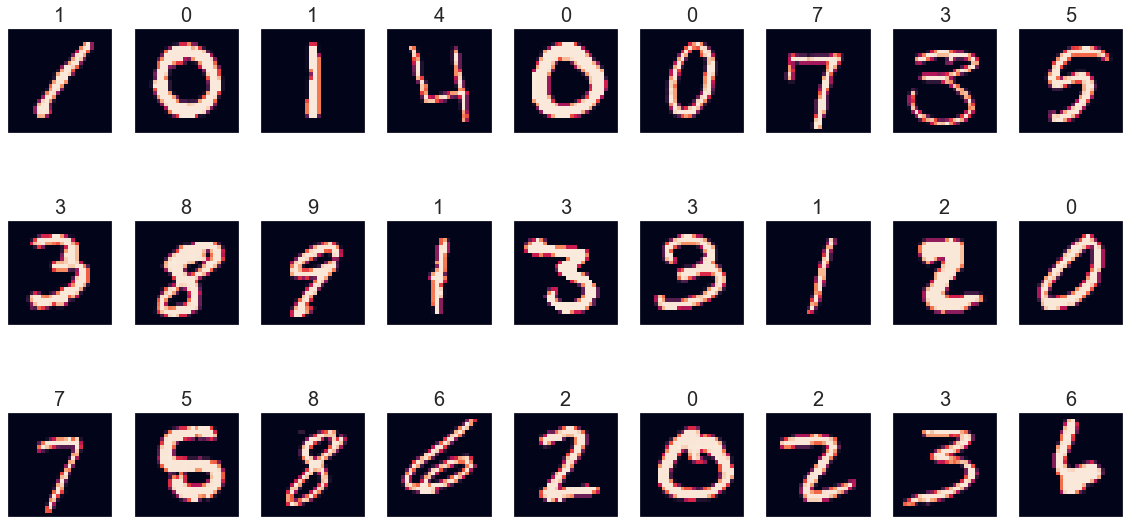

In [18]:
plt.figure(figsize=(20, 10))
for i in range(27):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x.iloc[i].to_numpy().reshape((28,28,1)))
    plt.title(train_y[i],size = 20)
plt.show()

In [11]:
a = dict(train['label'].value_counts())
a = dict(sorted(a.items()))

In [12]:
a

{0: 4132,
 1: 4684,
 2: 4177,
 3: 4351,
 4: 4072,
 5: 3795,
 6: 4137,
 7: 4401,
 8: 4063,
 9: 4188}

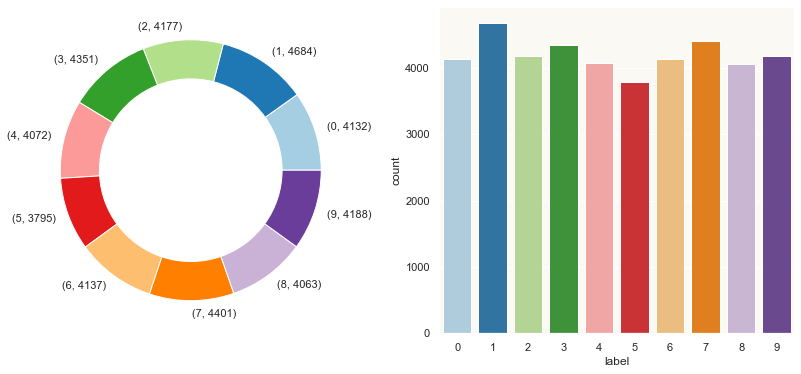

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(a.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,labels=a.items(), radius=1)
ax2 = sns.countplot(train['label'])
plt.show()

In [21]:
train_x.shape

(42000, 784)

In [23]:
train_y.shape

(42000,)

In [24]:
train_x = train_x/255.0
train_x.shape

(42000, 784)

In [25]:
train_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
Test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Test = Test/255.0
Test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# train_x = train_x.values.reshape(-1,28,28,1)
Test = Test.values.reshape(-1,28,28,1)
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",Test.shape)

X_train Shape  :  (42000, 28, 28, 1)
Test Shape     :  (28000, 28, 28, 1)


In [89]:
Test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [33]:
x_train,x_val,y_train,y_val = train_test_split(train_x,train_y,test_size = 0.2,random_state = 12345)

In [36]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

In [37]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [38]:
model.compile(loss ='sparse_categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),metrics =['accuracy'])

In [39]:
history = model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=30,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/30
34/34 [==============================] - 5s 118ms/step - loss: 1.3626 - accuracy: 0.5580 - val_loss: 0.5095 - val_accuracy: 0.8506
Epoch 2/30
34/34 [==============================] - 4s 110ms/step - loss: 0.5273 - accuracy: 0.8307 - val_loss: 0.2802 - val_accuracy: 0.9186
Epoch 3/30
34/34 [==============================] - 4s 110ms/step - loss: 0.3510 - accuracy: 0.8895 - val_loss: 0.1991 - val_accuracy: 0.9405
Epoch 4/30
34/34 [==============================] - 4s 114ms/step - loss: 0.2679 - accuracy: 0.9160 - val_loss: 0.1529 - val_accuracy: 0.9552
Epoch 5/30
34/34 [==============================] - 4s 110ms/step - loss: 0.2211 - accuracy: 0.9309 - val_loss: 0.1241 - val_accuracy: 0.9612
Epoch 6/30
34/34 [==============================] - 4s 110ms/step - loss: 0.1881 - accuracy: 0.9409 - val_loss: 0.1075 - val_accuracy: 0.9682
Epoch 7/30
34/34 [==============================] - 4s 110ms/step - loss: 0.1682 - accuracy: 0.9476 - val_loss: 0.0917 - val_accuracy: 0.9735
Epoch 

In [42]:
print('Loss           : ' + str(history.history['loss'][-1]), 'Accuracy       : '+ 
      str(history.history['accuracy'][-1]), sep='\n')

Loss           : 0.05096329748630524
Accuracy       : 0.9833630919456482


In [44]:
history.history

{'loss': [1.3626430034637451,
  0.5272893309593201,
  0.3509831130504608,
  0.26793617010116577,
  0.2210719734430313,
  0.18806704878807068,
  0.16824623942375183,
  0.14652614295482635,
  0.13499195873737335,
  0.12133928388357162,
  0.1164483055472374,
  0.10605146735906601,
  0.09993526339530945,
  0.09446418285369873,
  0.09061922132968903,
  0.08523879200220108,
  0.08427558094263077,
  0.0775444358587265,
  0.0740128681063652,
  0.0720430538058281,
  0.06990697979927063,
  0.06653615087270737,
  0.06308937817811966,
  0.061201781034469604,
  0.059975333511829376,
  0.05887879803776741,
  0.058247003704309464,
  0.0558180995285511,
  0.051164448261260986,
  0.05096329748630524],
 'accuracy': [0.5580059289932251,
  0.8306845426559448,
  0.8895238041877747,
  0.9159821271896362,
  0.9308928847312927,
  0.9409226179122925,
  0.947648823261261,
  0.9526785612106323,
  0.9573214054107666,
  0.961934506893158,
  0.9622619152069092,
  0.9667261838912964,
  0.9687202572822571,
  0.970446

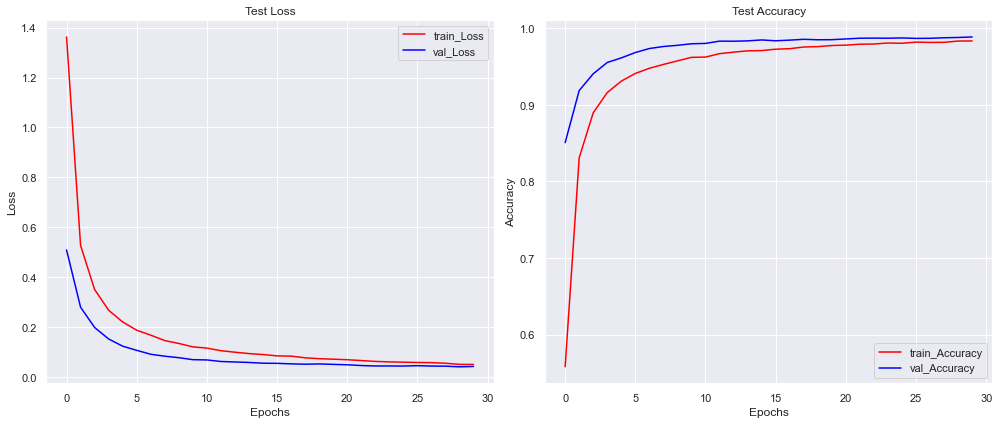

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))

ax1.plot(history.history['loss'], color='r', label="train_Loss")
ax1.plot(history.history['val_loss'], color='b', label="val_Loss")
ax1.legend()
ax1.set_title("Test Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")

ax2.plot(history.history['accuracy'], color='r', label="train_Accuracy")
ax2.plot(history.history['val_accuracy'], color='b', label="val_Accuracy")
ax2.legend()
ax2.set_title("Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
fig.tight_layout()

263/263 [==============================] - 1s 4ms/step


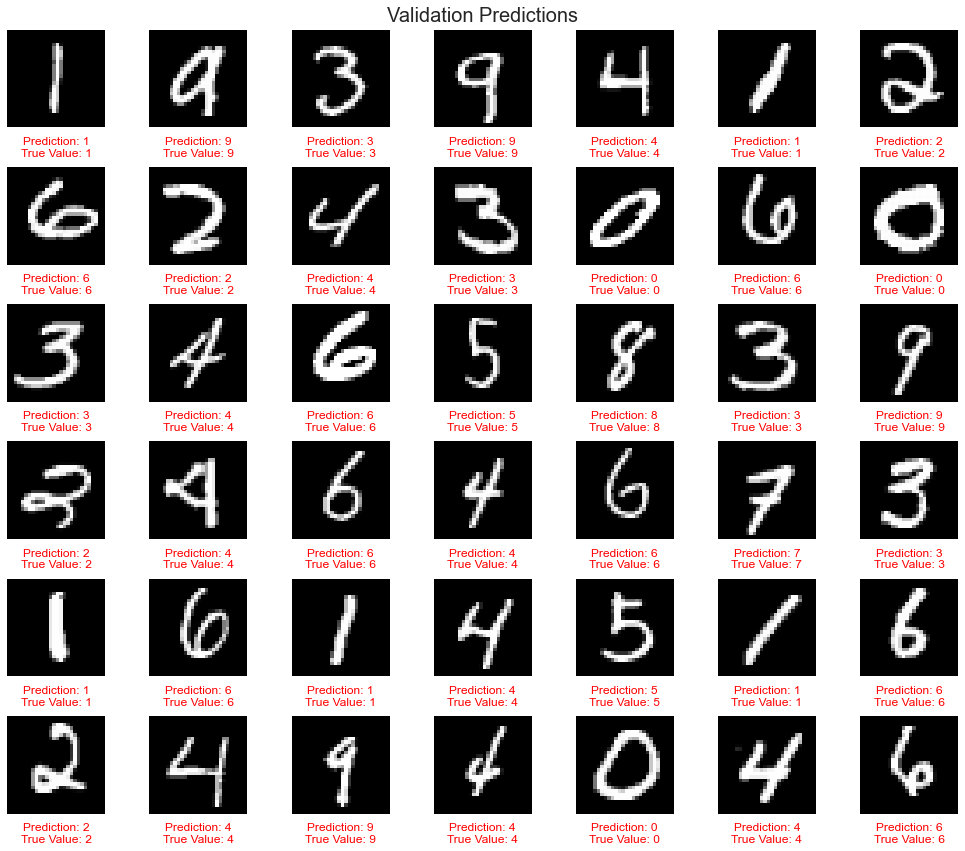

In [72]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.array(y_val)
rows = 6
cols = 7
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Validation Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = x_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="red")
f.tight_layout()
    
f.show()

In [67]:
Y_pred

array([[4.1927191e-08, 9.9999630e-01, 2.8216303e-07, ..., 1.7680244e-07,
        7.9377423e-07, 3.3213465e-07],
       [1.9979614e-03, 1.3370260e-04, 3.3425076e-03, ..., 2.9834337e-03,
        9.1416994e-04, 9.7189587e-01],
       [5.4715905e-11, 1.5615605e-08, 6.8851065e-08, ..., 8.4130196e-09,
        4.6388255e-08, 2.3562832e-08],
       ...,
       [4.7116293e-05, 6.0182106e-04, 5.1805288e-05, ..., 4.5358573e-04,
        1.9490995e-02, 9.6416712e-01],
       [7.3596280e-09, 1.1370360e-06, 3.0928084e-07, ..., 6.6419148e-08,
        2.0794027e-06, 8.1690177e-06],
       [9.9999988e-01, 2.3740918e-10, 3.6533983e-08, ..., 7.0539623e-09,
        1.1636985e-08, 3.1684355e-08]], dtype=float32)

In [57]:
Y_true

array([1, 9, 3, ..., 9, 3, 0], dtype=int64)

In [59]:
Y_pred_classes

array([1, 9, 3, ..., 9, 3, 0], dtype=int64)

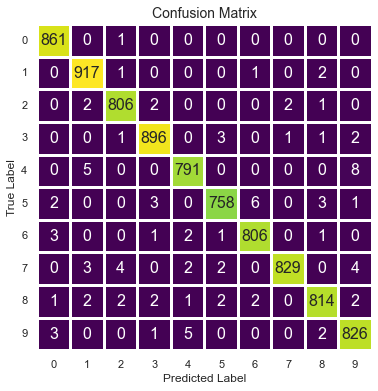

In [84]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=3,cmap="viridis",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

875/875 [==============================] - 2s 3ms/step


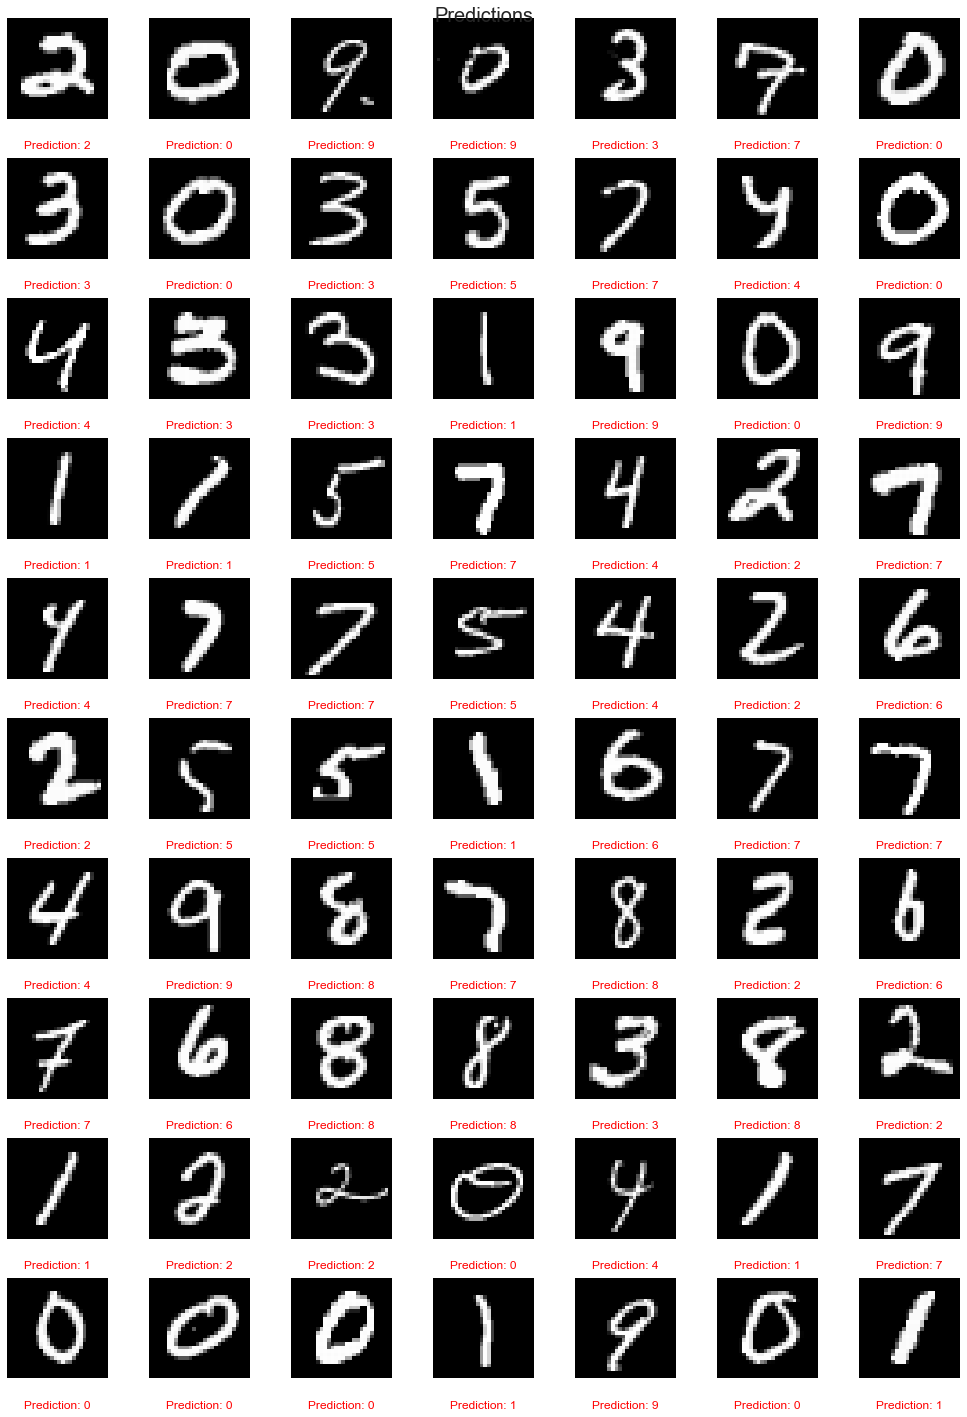

In [99]:
Y_pred = model.predict(Test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
rows = 10
cols = 7
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = Test[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}".format(Y_pred_classes[i]),
              y=-0.35,color="red")
f.tight_layout()
    
f.show()

In [101]:
submission = pd.DataFrame({'ImageId': range(1,28001), 'Label': Y_pred_classes})

In [102]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [103]:
submission.to_csv('my_submission_Lepro.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
